In [ ]:
#In this python programe we are developing a simple Keras Based CNN for image classification   

In [ ]:
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
import time

In [ ]:
#From scratch design a shallow CNN composed of a set of conv, pool and FC layers

In [ ]:
img_width, img_height = 250, 250
batch_size = 32
samples_per_epoch = 3
validation_steps = 300
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 3
classes_num = 2
lr = 0.0004


In [ ]:
model = Sequential()
model.add(Convolution2D(nb_filters1, conv1_size, conv1_size, padding="same", input_shape=(img_width, img_height, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(nb_filters2, conv2_size, conv2_size, padding= "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(classes_num, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])


In [ ]:
#Train the model
#Plot the error vs epoch curve
#Report the accuracy on the test set

In [ ]:
# for the purpuse of this example we are loading a series of images stored in a Google drive file 
#feel free ro change this part of the code

In [ ]:
from google.colab import drive
# Mount the google drive folder to colab:
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
train_data_path = 'gdrive/My Drive/Colab-Notebooks/Newdata/Train'
validation_data_path = 'gdrive/My Drive/Colab-Notebooks/Newdata/Test'

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 82 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [ ]:
DEV = False
argvs = sys.argv
argc = len(argvs)

if argc > 1 and (argvs[1] == "--development" or argvs[1] == "-d"):
  DEV = True

if DEV:
  epochs = 2
else:
  epochs = 20

In [ ]:
log_dir = './tf-log/'
tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
cbks = [tb_cb]

history = model.fit_generator(
    train_generator,
    samples_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=cbks,
    validation_steps=validation_steps)



target_dir = 'gdrive/My Drive/Colab-Notebooks/models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('gdrive/My Drive/Colab-Notebooks/models/model.h5')
model.save_weights('gdrive/My Drive/Colab-Notebooks/models/weights.h5')

Epoch 1/20
3/3 [==============================] - 2s 735ms/step - loss: 0.0227 - accuracy: 0.9878 - val_loss: 3.4241 - val_accuracy: 0.4390
Epoch 2/20
3/3 [==============================] - 1s 359ms/step - loss: 0.0116 - accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 1s 358ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 1s 364ms/step - loss: 0.0563 - accuracy: 0.9756
Epoch 5/20
3/3 [==============================] - 1s 350ms/step - loss: 0.0408 - accuracy: 0.9756
Epoch 6/20
3/3 [==============================] - 1s 477ms/step - loss: 0.0474 - accuracy: 0.9756
Epoch 7/20
3/3 [==============================] - 1s 468ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 1s 366ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 1s 363ms/step - loss: 0.0580 - accuracy: 0.9634
Epoch 10/20
3/3 [==============================] - 1s 373ms/step - loss: 0.0

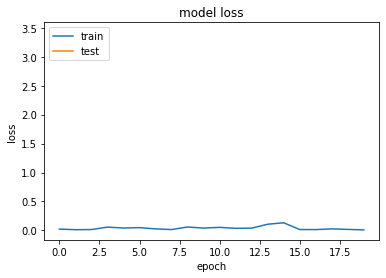

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
#Load in pre-trained weights from a network trained on a large dataset
#Extract features from the train and test images using the pre-trained model
#Classify the test images using a 1-nearst neighbour classifier
#Load in pre-trained weights from a network trained on a large dataset
#Freeze all the weights in the convolutional layers

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model
import numpy as np

In [ ]:
model_path = 'gdrive/My Drive/Colab-Notebooks/models/model.h5'
model_weights_path = 'gdrive/My Drive/Colab-Notebooks/models/weights.h5'
test_path = 'gdrive/My Drive/Colab-Notebooks/Newdata/TEST-IM/'

#Load the pre-trained models
model = load_model(model_path)
model.load_weights(model_weights_path)

#Define image parameters
img_width, img_height = 250, 250

#Prediction Function
def predict(file):
  x = load_img(file, target_size=(img_width,img_height))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  #print(result)
  answer = np.argmax(result)
  if answer == 1:
    print("Predicted: Horse")
  elif answer == 0:
    print ("Predicted: Cow")

  return answer

  #Walk the directory for every image
for i, ret in enumerate(os.walk(test_path)):
  for i, filename in enumerate(ret[2]):
    if filename.startswith("."):
      continue
    
    print(ret[0] + '/' + filename)
    result = predict(ret[0] + '/' + filename)
    print(" ")

gdrive/My Drive/Colab-Notebooks/Newdata/TEST-IM//horse5-090-202.png
Predicted: Horse
 
gdrive/My Drive/Colab-Notebooks/Newdata/TEST-IM//horse5-090-338.png
Predicted: Horse
 
gdrive/My Drive/Colab-Notebooks/Newdata/TEST-IM//cow3-066-027.png
Predicted: Cow
 
